# MR STAT 
by glebmikh

На данный момент сообщество python не имеет полноценного пакета для статистического анализа:

- реализации статистических тестов разбросаны по разным библиотекам;
- некоторые из основных тестов не имеют стандартной реализации.

Я решил, что будет удобно собрать в один скрипт все стандартные реализации и дополнить их недостающими методами. Сделав это, больше не придется вспоминать, где что лежит или копировать куски кода из предыдущих проектов.

### Содержание

- [1. Одновыборочный ти-тест](#1.-Одновыборочный-ти-тест)
	- [1.1 Гипотеза о среднием](#1.1-Гипотеза-о-среднием)
	- [1.2 Доверительный интервал для среднего](#1.2-Доверительный-интервал-для-среднего)
- [2. Тесты на распределение](#2.-Тесты-на-распределение)
	- [2.1 Критерий Шапиро-Уилка](#2.1-Критерий-Шапиро-Уилка)
	- [2.2 КуКу график](#2.2-КуКу-график)
	- [2.3 Тест Колмогорова-Смирнова для проверки формы распределения](#2.3-Тест-Колмогорова-Смирнова-для-проверки-формы-распределения)
	- [2.4 Двухвыборочный тест Колмогорова-Смирнова](#2.4-Двухвыборочный-тест-Колмогорова-Смирнова)
- [3. Двухвыборочные ти-тесты](#3.-Двухвыборочные-ти-тесты)
	- [3.1 Ти-тест для двух независимых выборок](#3.1-Ти-тест-для-двух-независимых-выборок)
	- [3.2 Доверительный интервал разности средних для двух независимых выборок](#3.2-Доверительный-интервал-разности-средних-для-двух-независимых-выборок)
- [4. Пропорция](#4.-Пропорция)
	- [4.1. Тест для одной доли](#4.1.-Тест-для-одной-доли)
	- [4.2 Доверительная интервал для одной доли](#4.2-Доверительная-интервал-для-одной-доли)
	- [4.3 Размер выборки для заданной доли и ширины интервала](#4.3-Размер-выборки-для-заданной-доли-и-ширины-интервала)
- [5. Две доли и АБ тестинг](#5.-Две-доли-и-АБ-тестинг)
	- [5.1 Тест разности двух независимых долей](#5.1-Тест-разности-двух-независимых-долей)
	- [5.2 Доверительный интервал для разности двух незавимых долей](#5.2-Доверительный-интервал-для-разности-двух-незавимых-долей)
	- [5.3 Тест Хи-квадрат](#5.3-Тест-Хи-квадрат)
	- [5.4 Точный тест Фишера](#5.4-Точный-тест-Фишера)
	- [5.5 Размер выборок для для двух пропорций](#5.5-Размер-выборок-для-для-двух-пропорций)
- [6. Непараметрические критерии](#6.-Непараметрические-критерии)
	- [6.1 Критерий знаков](#6.1-Критерий-знаков)
	- [6.2 Критерий знаковых рангов Вилкоксона](#6.2-Критерий-знаковых-рангов-Вилкоксона)
	- [6.3 Критерий Манна-Уитни](#6.3-Критерий-Манна-Уитни)
	- [6.4 Бутстреп](#6.4-Бутстреп)
- [7. Корреляция](#7.-Корреляция)
	- [7.1 Коэффициет корреляции Пирсона](#7.1-Коэффициет-корреляции-Пирсона)
	- [7.2 Коэффициет корреляции Спирмена](#7.2-Коэффициет-корреляции-Спирмена)
	- [7.3 Коэффициент Крамера](#7.3-Коэффициент-Крамера)
- [8. Связанные выборки](#8.-Связанные-выборки)
	- [8.1 Ти-тест для связанных выборок](#8.1-Ти-тест-для-связанных-выборок)
	- [8.2 Тест для разности двух долей - связанные выборки](#8.2-Тест-для-разности-двух-долей---связанные-выборки)
	- [8.3 Доверительный интервал для разности долей ](#8.3-Доверительный-интервал-для-разности-долей-)
	- [8.4 Непараметрические критерии для связанных выборок](#8.4-Непараметрические-критерии-для-связанных-выборок)
- [9. Дисперсионный анализ](#9.-Дисперсионный-анализ)
	- [9.1 Однофакторная ANOVA](#9.1-Однофакторная-ANOVA)
	- [9.2 Критерий Краскела-Уоллиса](#9.2-Критерий-Краскела-Уоллиса)
	- [9.3 Двухфакторная ANOVA](#9.3-Двухфакторная-ANOVA)

В данном руководстве я буду использовать дата-сет [hsb2](https://github.com/rpruim/OpenIntro/blob/master/data/hsb2.csv) и примеры из статьи [What statistical analysis should I use?](http://www.ats.ucla.edu/stat/stata/whatstat/whatstat.htm), которые дополню некоторыми другими полезными случаями. В данных hsb2 содержится 200 наблюдений об учениках старших классов: социодемографические данные и оценки полученные на тестах по разным предметам.

Если импорт выдаст ошибки - просто установите недостающие библиотеки.

In [1]:
import mrstat
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import pandas as pd
%matplotlib inline
hsb = pd.read_csv('hsb2.csv')

In [2]:
hsb.head()

,id,female,race,ses,schtyp,prog,read,write,math,science,socst
0,70,0,4,1,1,1,57,52,41,47,57
1,121,1,4,2,1,3,68,59,53,63,61
2,86,0,4,3,1,1,44,33,54,58,31
3,141,0,4,3,1,3,63,44,47,53,56
4,172,0,4,2,1,2,47,52,57,53,61


### 1. Одновыборочный ти-тест

#### 1.1 Гипотеза о среднием

Проверим гипотезу, что средняя оценка на тесте по письму (write) равна 50 пунктам.

In [3]:
mrstat.ttest_1samp(hsb['write'],50)

Ttest_1sampResult(statistic=4.140324966963024, pvalue=5.1209194607163552e-05)

P-value получилось меньше 0.05 - это значит, что гипотеза о среднем равным 50 не принимается.

#### 1.2 Доверительный интервал для среднего

Чтобы получить представление о среднем для write построим 95% доверительный интервал.

In [4]:
mrstat.zconfint(hsb['write'])

(51.461359138353302, 54.088640861646695)

Данный интервал с 95% вероятностью содержит истинное среднее для оценки write. Так же доверительный интервал можно записать в следующем виде:

In [5]:
lb, hb = mrstat.zconfint(hsb['write'])
print hsb.write.mean(), '+/-', (hb-lb)/2.

52.775 +/- 1.31364086165


### 2. Тесты на распределение

#### 2.1 Критерий Шапиро-Уилка

Проверяем гипотезу о том, что случайная величина распределена нормально.

In [6]:
mrstat.shapiro(hsb['write'])

(0.9470317363739014, 9.865516403806396e-07)

P-value < 0.05 следовательно гипотеза о нормальности распределения оценок по write отвергается. Не лишним так же всегда взглянуть на гистограмму.

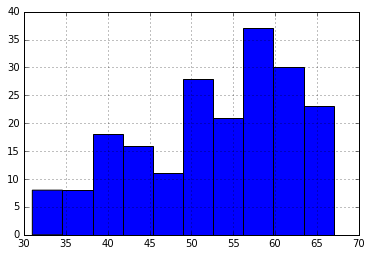

In [7]:
hsb['write'].hist()

Распределения действительно не симметричное и не очень похоже на нормальное. Попробуем найти нормальное распределение среди оценок.

In [8]:
for col in hsb.columns[-5:]:
    print col, mrstat.shapiro(hsb[col])

read (0.9797889590263367, 0.005552584305405617)
write (0.9470317363739014, 9.865516403806396e-07)
math (0.976807177066803, 0.002145080827176571)
science (0.9852479696273804, 0.03476548567414284)
socst (0.9606784582138062, 2.343731830478646e-05)


Самый большой p-value получился у science. Посмотрим на гистограмму.

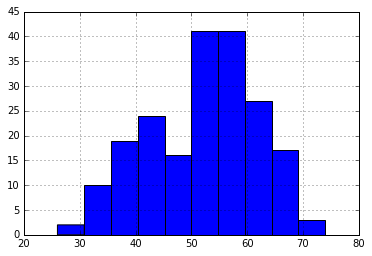

In [9]:
hsb.science.hist()

Распределение действительно более симметричное и напоминает нормальное.

#### 2.2 КуКу график

Это визуальный спобоб проверить распределение на нормальность. Посмотрим на write.

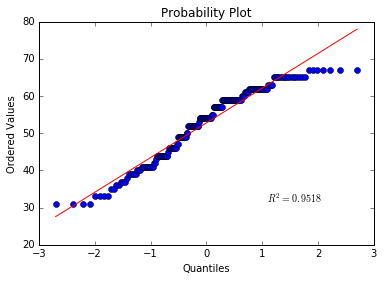

In [10]:
_,_ = mrstat.qq_plot(hsb.write,dist='norm',plot=plt)

На этом графике сравниваются теотические квантили распределения (красная прямая) и квантили полученные из фактического распределения переменной (синии точки). Если точки лежат вдоль прямой - то распределение можно считать нормальным. В данном случае точки с прямой не совпадают, в основном из-за тяжелого правого хвоста. Взглянем на куку график для science.

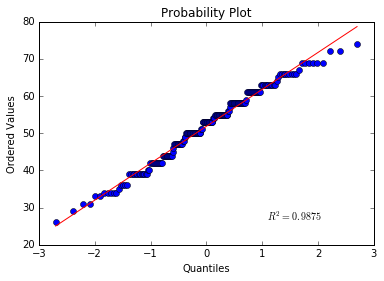

In [11]:
_,_ = mrstat.qq_plot(hsb.science,dist='norm',plot=plt)

Видно, что синие точки на этом графике гораздо сильнее привязаны к красной линии. Это говорит о том, что science распределен более нормально. КуКу график можно строить не только для нормального распределения, но и для любого другого.

#### 2.3 Тест Колмогорова-Смирнова для проверки формы распределения

Нормальность (и не только) можно проверить так же и при помощи этого теста.

In [12]:
mrstat.kstest(hsb['write'],'norm',args=(hsb['write'].mean(),
                                        hsb['write'].std(ddof=1)))

KstestResult(statistic=0.1343270786922024, pvalue=0.0013129370215807512)

P-value < 0.05 следовательно гипотеза о нормальности не принимается. Как вы поняли, в args передаются параметры нормального распределения, с которым мы хотим сравнить распределение выборки. Я предал туда выборочное среднее и стандартное отклонения. Проверим science.

In [13]:
mrstat.kstest(hsb['science'],'norm',args=(hsb['science'].mean(),
                                          hsb['science'].std(ddof=1)))

KstestResult(statistic=0.076233630374236583, pvalue=0.18585568226600646)

P-value получился больше 0.05 следовательно можно заключить, что данная выборка принадлежит к нормальному распределению. С помощью этого теста можно сравнивать выборки не только с нормальным распределением, но и с другими.

#### 2.4 Двухвыборочный тест Колмогорова-Смирнова

С помощью этого теста можно проверить принадлежат ли две выборки к одному распределению.

In [14]:
mrstat.ks_2samp(hsb['write'],hsb['science'])

Ks_2sampResult(statistic=0.15000000000000002, pvalue=0.01973175474986974)

Если p-value больше 0.05 - можно заключить, что выборки принадлежат к одному распределению. Write и science принадлежат к разным. А вот write и socst к одному.

In [15]:
mrstat.ks_2samp(hsb['write'],hsb['socst'])

Ks_2sampResult(statistic=0.125, pvalue=0.080917080808807579)

### 3. Двухвыборочные ти-тесты

#### 3.1 Ти-тест для двух независимых выборок

Данный тест позволяет понять если значимые различия между средними двух независимых выборок. Сравним оценки по тесту science для мальчиков и девочек.

In [16]:
s_boys = hsb[hsb['female'] == 0]['science']
s_girls = hsb[hsb['female'] == 1]['science']
print s_boys.mean(), s_girls.mean()

53.2307692308 50.6972477064


Средняя оценка по научным дисциплинам у мальчиков выше. Проверим, имеет ли это утверждение статистическую значимость.

In [17]:
mrstat.ttest_ind(s_boys,s_girls,equal_var=False)

Ttest_indResult(statistic=1.7847013349359799, pvalue=0.076026848666140553)

P-value >= 0.05, а значит нельзя утверждать, что средние различны. Теперь проведем такой же тест для write.

In [18]:
w_boys = hsb[hsb['female'] == 0]['write']
w_girls = hsb[hsb['female'] == 1]['write']
print w_boys.mean(), w_girls.mean()

50.1208791209 54.9908256881


In [19]:
mrstat.ttest_ind(w_boys,w_girls,equal_var=False)

Ttest_indResult(statistic=-3.6564080478875276, pvalue=0.00034088493594266187)

Получилось, что средние оценки по тесту write у мальчиков и девочек статистически значимо разные.

#### 3.2 Доверительный интервал разности средних для двух независимых выборок

Построим 95% доверительный интервал для разности средних оценок science.

In [20]:
mrstat.mean_diff_confint_ind(s_boys,s_girls)

(-0.22316404940007306, 5.2902070980945028)

Истинное значение разницы для двух средних с 95% вероятностью лежит в этом интервале. Данный интервая содержит 0 - это значит, что разницу двух средних нельзя считать отличной от нуля. Построим такой же интервал для оценок по write.

In [21]:
mrstat.mean_diff_confint_ind(w_girls,w_boys)

(2.2980585638240707, 7.4418345705644668)

Данный интервал не содержит ноль - значит разницу можно признать отличной от нуля.

### 4. Пропорция

#### 4.1. Тест для одной доли

Рассчитаем долю девочек в выборке.

In [22]:
hsb.female.mean()

0.545

Сравним долю девочек в выборке с гипотетической долей 0.5

In [23]:
mrstat.prop_test(hsb.female,0.5)

0.20125699204448533

P-value получился > 0.05 значит мы не можем утверждать, что истинная доля девочек отлична от 0.5

#### 4.2 Доверительная интервал для одной доли

In [24]:
mrstat.prop_confint(hsb.female)

(0.47598602492749653, 0.61401397507250355)

Истинная доля девочек с 95% вероятностью лежит в этом интервале. Интервал содержит 0.5 - значит нет оснований утверждать, что истинная доля отлична от 0.5. Запишем так же в стиле плюс-минус:

In [25]:
lb, hb = mrstat.prop_confint(hsb['female'])
print hsb.female.mean(), '+/-', (hb-lb)/2.

0.545 +/- 0.0690139750725


#### 4.3 Размер выборки для заданной доли и ширины интервала

С попощью данной процедуры можно определить какой размер выборки потребуется для того, чтобы получить доверительный интервал заданной ширины. Например нужно понять, сколько наблюдений потребуется, чтобы утверждать, что истинное среднее (доля) равно 0.5 плюс-минус 0.05. Для этого:

In [26]:
mrstat.samplesize_confint_proportion(0.5,0.05)

384.14588206941266

Потребуется выборка размером 384.

### 5. Две доли и АБ тестинг

#### 5.1 Тест разности двух независимых долей

Проверим различается ли доля тех, кто ходит в частную школу среди мальчиков и девочек. Для начала построим таблицу сопряженности.

In [27]:
table = hsb.pivot_table(values=u'id',index=u'schtyp',columns=u'female',aggfunc='count')
table

female,0,1
schtyp,,
1,77,91
2,14,18


Теперь рассчитаем долю учащихся в частных школах для мальчиков и девочек, а так же размер выборок.

In [28]:
mrstat.get_props_and_lens(table)

(0.15384615384615385, 91, 0.16513761467889909, 109)

Доля мальчиков в частных школах равна 0.15, а девочек 0.17. Проверим значима ли эта разница.

In [29]:
mrstat.proportions_diff_ind(*mrstat.get_props_and_lens(table))

0.82828242684033948

P-value получился гораздо больше 0.05 - следовательно нельзя отвергнуть гипотезу о том, что доли равны. Делаем вывод, что доля тех, кто учится в частных школах не зависит от пола.

#### 5.2 Доверительный интервал для разности двух незавимых долей

Построим 95% доверительный интервал для разности долей частных школ среди мальчиков и девочек.

In [30]:
mrstat.proportions_confint_diff_ind(*mrstat.get_props_and_lens(table))

(-0.11304660507498858, 0.090463683409498105)

Доверительный интервал получился очень широким, а так же он содержит 0. На основе этого тоже можно сделать вывод, что доли учащихся в частных школах среди мальчиков и девочек значимо не отличаются.

Обратите внимание, что в mrstat есть несколько похожих функций для проверки гипотез о доле и построения доверительных интрервалов:

    mrstat.proportions_confint_diff_ind(p1,n1,p2,n2) - берет на вход доли и размеры выборок
    mrstat.proportions_confint_diff_ind_samples(sample1,sample2) - берет на вход две выборки из 0 и 1
    mrstat.proportions_confint_diff_ind_table(contigency_table) - берет на вход таблицу сопряженности

#### 5.3 Тест Хи-квадрат

С помощью теста хи-квадрат можно проверить имеются ли статистически значимые различия между долей частных школ среди мальчиков и девочек. Для этого сначала нужно посчитать таблицу сопряженности.

In [31]:
table

female,0,1
schtyp,,
1,77,91
2,14,18


In [32]:
mrstat.chi2_contingency(table,correction=False)

(0.04704775346977183, 0.82828242684033948, 1L, array([[ 76.44,  91.56],
        [ 14.56,  17.44]]))

P-value получился равным 0.83, это больше чем 0.05 следовательно гипотеза о том, что доли различаются, отвергается. Обратите внимание, что p-value получилось абсолютно такой же, как в тесте для двух независимых долей в пункте 5.1. Это происходит из-за того, что в основе теста для двух долей лежит нормальное распределение, а хи-квадрат - это распределение, которое является производной от нормального распределениея, и для данного случая они совпадают.

#### 5.4 Точный тест Фишера

Если в таблице сопряженности есть ячейки содержащие значения меньше 5, то хи-квадрат использовать нельзя. Но можно использовать точный тест Фишера. На вход он принимает ту же таблицу сопряженности.

In [33]:
mrstat.fisher_exact(table)

(1.0879120879120878, 0.84917505847685981)

Да, кстати всё это примеры АБ тестинга).

#### 5.5 Размер выборок для для двух пропорций

При планировании аб тестирования требуется понимать, какого объема выборка потребуется. Для того, чтобы это сделать нужно знать следующие параметры:

- базовый уровень показателя p1. т.е. это та цифра, котороую необходимо улучшить
- желаемый уровень показателя, т.е цифра, при которой тестирование будет считаться успешным. Определяется экспертно.
- достигаемый уровень значимости и мощность. Общепринятые стандарты это 0.05 и 0.8
- пропорции контрольной и тестовой выборок, если необходимо.

Рассмотрим на примере. Допустим есть какой-либо показатель доли в 10% и мы хотим его увеличить с помощью новой технологии. Увеличение будет считаться успеным, если показатель выростет на 20%. Так же мы не хотим делать большую контрольную группу, чтобы сразу получить выгоду от внедрения новой технологии - сделаем контрольную группу 20% от всего теста. Уровень значимости и мощность оставим стандартными. Вот что получится:

In [34]:
p1 = 0.1
p2 = 0.1 * 1.2

In [35]:
mrstat.two_proportions_sample_size(p1,p2,frac=0.2)

(2396.5, 9586.0)

Получается, что для того чтобы считать тестирование состоявшимся необходимо накопить 2396.5 в контроле и 9586.0 в пилоте или 11982.5 для всего тестирования. Данные значения нужно округлять до целого, а еще лучше до круглых чисел в большую сторону.

### 6. Непараметрические критерии

Непараметрические критерии следует использовать с крайне ненормальными и несимметричными распределениями.

#### 6.1 Критерий знаков

Применяется для проверки гипотезы о медиане. Не предъявляет никаких требований к распределению. Проверим гипотезу о том, что медиана оценок по write равна 50.

In [36]:
np.median(hsb.write)

54.0

In [37]:
mrstat.sign_test(hsb.write,50)

(27.0, 0.00015185854094876164)

P-value маленький следовательно гипотеза о медиане равной 50 не принимается.

#### 6.2 Критерий знаковых рангов Вилкоксона

Этот криетерий использует больше информации, чем просто критерий знаков. Проверим ту же гипотезу.

In [38]:
mrstat.wilcoxon(hsb.write.values-50)

WilcoxonResult(statistic=6524.0, pvalue=3.6917631525880871e-05)

В данном случае гипотеза о медиане равной 50 отвергается с еще большей силой. Критерий знаков и критерий знаковых рангов Вилкоксона являются альтернативой для одновыборочного ти-теста, а критерий знаковых рангов может еще применяться провеки гипотезы о равенстве средних для двух зависимых выборок.

#### 6.3 Критерий Манна-Уитни

Критерий Манна-Уитни является альтернативой ти-теста для двух независимых выборок и может применяться при любом типе распределения. Этот критерий проверяет гипотезу о том, что две выборки взяты из одной генеральной совокупности, в частности, насколько значения одной выборки больше чем в другой. Применим критерий Манна-Уитни к случаю с оценкой по тесту write для мальчиков и девочек.

In [39]:
mrstat.mannwhitneyu(w_boys,w_girls)

MannwhitneyuResult(statistic=3606.0, pvalue=0.00043746993681806757)

P-value < 0.05 следовательно гипотеза о том, что две выборки пришли из одного распределения отвергается. Результаты критения Манна-Уитни можно применять на равне с обычным ти-тестом.

Кстата, критерий Манна-Уитни является официальным "сдаточным" критерием для ряда АБ тестов в Yandex.

#### 6.4 Бутстреп

С помощью бутстрепа можно проверять любой параметр вне зависимости от распределения выборки.

In [40]:
print np.mean(hsb.write)
print np.median(hsb.write)

52.775
54.0


In [41]:
print '(p-value for mean = 51) = ', mrstat.bootstrap_test(hsb.write.values,51,np.mean)
print '(p-value for median = 53) = ', mrstat.bootstrap_test(hsb.write.values,53,np.median)

(p-value for mean = 51) =  0.01
(p-value for median = 53) =  0.163


Гипотеза о среднем равном 51 отвергается (p-value < 0.05), гипотеза о медиане равной 53 принимается (p-value > 0.05).

С помощью бутстрепа так же можно строить доверительные интервалы.

In [42]:
print 'mean interval ', mrstat.bootstrap_conf_int(hsb.write.values,np.mean)
print 'median interval ', mrstat.bootstrap_conf_int(hsb.write.values,np.median)

mean interval  [ 51.529875  53.980625]
median interval  [ 52.  57.]


А так же доверительный интревал для разницы двух параметров.

In [43]:
print mrstat.bootstrap_diff_conf_int(hsb.write.values,hsb.read.values,np.mean)
print mrstat.bootstrap_diff_conf_int(hsb.write.values,hsb.read.values,np.median)

[-1.570125  2.540125]
[ 0.5  7. ]


Мы видим, что разницы и для средних и для медиан между оценками по write и read содержат 0, следовательно нельзя утверждать, что между этими параметрами существует значимая разница.

Бутстреп можно использовать тогда, когда нельзя применить другие модели из-за различных ограничений, например, по размеру выборки.

### 7. Корреляция

#### 7.1 Коэффициет корреляции Пирсона

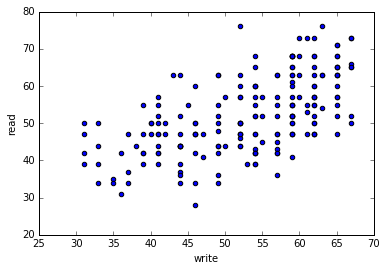

In [44]:
hsb.plot(kind='scatter',x='write',y='read')

In [45]:
mrstat.pearsonr(hsb.write,hsb.read)

(0.59677647908804532, 1.1056411255416739e-20)

Корреляция получилась равной 0.5968, а p-value для нулейвой гипотезы об отсутсвии корреляции < 0.05, следовательно можно заключить, что между этими переменными существует статистически значимая корреляция.

#### 7.2 Коэффициет корреляции Спирмена

Корреляция Спирмена способна уловить нелинейную связь между переменными. Возьмем напремер x и посчитаем корреляцию Пирсона с его экспонентой.

In [46]:
x = np.linspace(0,100,101)
y = np.exp(x)
mrstat.pearsonr(x,y)

(0.25080845773967969, 0.011412991126929171)

Коэффициент получился очень маленьким, но связь определенно есть - функция монотонно возрастает. Взглянем на график.

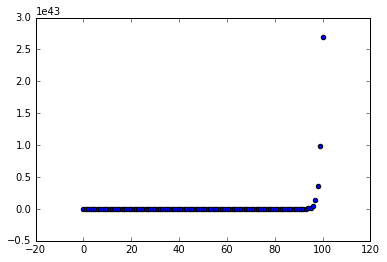

In [47]:
plt.scatter(x,y)

Теперь посчитаем корреляцию Спирмена.

In [48]:
mrstat.spearmanr(x,y)

SpearmanrResult(correlation=0.99999999999999989, pvalue=0.0)

Коэффициент Спирмена равен 1! Когда корреляция Спирмена больше, чем корреляция Пирсона - это знак, что можно сделать нелинейное преобразование и взять например логарифм. Это позволит перейти к линейным отношениям, а статистика любит линейные отношения.

#### 7.3 Коэффициент Крамера

Коэффициент Крамера позволяет оценить связь между двумя номинальными переменными. Он основан на статистике хи-квадрат. Посчитаем для связи между типом школы и полом ученика.

In [49]:
table

female,0,1
schtyp,,
1,77,91
2,14,18


In [50]:
mrstat.vcramer(table.values)

(0.01533749547184478, 0.82828242684033948)

Такое маленькое значение (0.01) говорит о том, что связи нет, а p-value не позволяет отвергнуть нулевую гипотезу о том, что пропорции не отличаются. Коэффициент Крамера принимает значения от 0 до 1, что делает его хорошо интерпретируемым.

### 8. Связанные выборки

#### 8.1 Ти-тест для связанных выборок

Тест для связанных выборок используется например при клинических испытаниях новых лекарств. Конкретный пример (взято из [курса](https://www.coursera.org/learn/stats-for-data-analysis/home/welcome)) : 

В рамках исследования эффективности препарата метилфенидат 24 пациента с синдромом дефицита внимания и гиперактивности в течение недели принимали либо метилфенидат, либо плацебо. В конце недели каждый пациент проходили тест на способность к подавлению импульсивных поведенческих реакций. На втором этапе плацебо и препарат менялись, и после недельного курса каждый испытуемые проходили второй тест.

Необходимо оценить эффективность препарата.

In [51]:
data = pd.read_csv('ADHD.txt', sep = ' ', header = 0)
data.columns = ['Placebo', 'Methylphenidate']
data.head()

,Placebo,Methylphenidate
0,57,62
1,27,49
2,32,30
3,31,34
4,34,38


Эти выборки являются свзянными, т.к. каждая строчка содержит результаты одного и того же пациена с лекарством и без. Проверим, есть ли статистически значимый эффект от приема препарата.

In [52]:
mrstat.ttest_rel(data.Methylphenidate,data.Placebo)

Ttest_relResult(statistic=3.2223624451230406, pvalue=0.003771488176381471)

Нулевая гипотеза в данном случае заключается в том, что средние не отличаются. P-value получилось < 0.05, а это значит, что нулевая гипотеза отвергается и можно заключить, что средние отличаются.

#### 8.2 Тест для разности двух долей - связанные выборки

Сгенерируем некоторые выборки и представим, что они связанные. Здесь та же история, что и с ти-тестом - представим, что это доля до и после какого-либо мероприятия. Нужно оценить повлияло ли мероприятие на долю.

In [53]:
a = [0]*150 + [1]*50
b = [0]*170 + [1]*30

In [54]:
print np.mean(a)
print np.mean(b)

0.25
0.15


In [55]:
mrstat.proportions_diff_rel(a,b)

2.4284674728924927e-06

P-value < 0.05 следовательно доли значимо различаются.

#### 8.3 Доверительный интервал для разности долей 

In [56]:
mrstat.proportions_confint_diff_rel(a,b)

(0.058422885269509665, 0.14157711473049034)

Доверительный интервал не содержит 0 следовательно доли различаются.

#### 8.4 Критерий знаков для связанных выборок

In [57]:
mrstat.sign_test(data.Methylphenidate - data.Placebo)

(5.0, 0.063914656639099121)

P-value > 0.05 следовательно нельзя заявлять, что медианы выборок отличаются.

#### 8.5 Критерий знаковых рангов Вилкоксона для связанных выборок

Нулевая гипотеза: две связанные выборки взяты из одной генеральной совокупности, т.е. не отличаются.

In [58]:
mrstat.wilcoxon(data.Methylphenidate,data.Placebo)

WilcoxonResult(statistic=48.5, pvalue=0.0037070137534509031)

P-value < 0.05 следовательно нулевая гипотеза отвергается - можно заявлять, что выборки различаются.

### 9. Дисперсионный анализ

#### 9.1 Однофакторная ANOVA

Используется для проверки гипотезы о том, что средние для двух и более групп одной вещественной переменной различаются. Проверим различается ли среднее по тесту write для разных типов школьной программы.

In [59]:
stats.f_oneway(hsb[hsb['prog'] == 1]['write'],
              hsb[hsb['prog'] == 2]['write'],
              hsb[hsb['prog'] == 3]['write'])

F_onewayResult(statistic=21.274737826343454, pvalue=4.3101626235711319e-09)

P-value < 0.05 следовательно нулевая гипотеза о равенстве средних не принимается. Посмотрим на эти средние.

In [60]:
hsb.groupby('prog')['write'].agg(['mean','std','count'])

,mean,std,count
prog,,,
1,51.333333,9.397775,45
2,56.257143,7.943343,105
3,46.760000,9.318754,50


Действительно - средние различается. И ANOVA подтверждает, что эти различия статистически значимые.

#### 9.2 Критерий Краскела-Уоллиса

Это непараметрический аналог ANOVA. Применяется тогда, когда нельзя сказать, что данные в группах распределены нормально.

In [61]:
stats.kruskal(hsb[hsb['prog'] == 1]['write'],
              hsb[hsb['prog'] == 2]['write'],
              hsb[hsb['prog'] == 3]['write'])

KruskalResult(statistic=34.045178212149644, pvalue=4.0474685563408278e-08)

Видим, что p-value практически такой же, как у ANOVA.

#### 9.3 Двухфакторная ANOVA

Применяется, когда нужно понять влияют ли на вещественную переменную две категориальные переменные. Допустим хочеться понять, зависят ли оценки по тесту write  от пола и социально экономического статуса учеников.

In [62]:
from mrstat import ols
from mrstat import anova_lm

In [63]:
data = hsb[['write','female','ses']]

In [64]:
formula = 'write ~ C(female) + C(ses) + C(female):C(ses)'
model = ols(formula, data).fit()
aov_table = anova_lm(model, typ=1)

In [65]:
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(female),1.0,1176.213845,1176.213845,14.626683,0.000177
C(ses),2.0,1080.599437,540.299718,6.718840,0.001509
C(female):C(ses),2.0,21.430904,10.715452,0.133251,0.875326
Residual,194.0,15600.630814,80.415623,NaN,NaN


По данной таблице можно сделать следующие выводы:
- write зависит от female (p-value = 0.00017 < 0.005)
- write завист от ses (p-value = 0.001509 < 0.005)
- write не зависит от взаимодейстивий female и ses (p-value = 0.875326 > 0.05)

Спасибо за внимание! )